In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,ElasticNet,ElasticNetCV,LassoCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('AIr Quality Index - City Data.csv')

In [4]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


## 1.Data Pre-processing

In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
df.shape

(29531, 16)

In [7]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,01-07-2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [11]:
df["Date"]= pd.to_datetime(df["Date"])

In [12]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-02-01,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-03-01,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-04-01,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-05-01,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [14]:
df['Year'] = df['Date'].dt.year

In [15]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-02-01,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-03-01,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-04-01,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-05-01,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020


In [16]:
(df.isnull().sum()/df.shape[0]*100)

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
Year           0.000000
dtype: float64

## Information Missing value

In [17]:
df['PM2.5'].mean()

67.45057794890272

In [18]:
df['PM2.5'].median()

48.57

In [19]:
df['PM10'].mean()

118.12710293078102

In [20]:
df['PM10'].median()

95.68

In [21]:
df['NO'].mean()

17.574729662029284

In [22]:
df['NO'].median()

9.89

In [23]:
df['NO2'].mean()

28.560659061126763

In [24]:
df['NO2'].median()

21.69

In [25]:
df['NOx'].mean()

32.309123333070055

In [26]:
df['NOx'].median()

23.52

In [27]:
df['NH3'].mean()

23.483476019371977

In [28]:
df['NH3'].median()

15.85

In [29]:
df['CO'].mean()

2.248598209085598

In [30]:
df['CO'].median()

0.89

In [31]:
df['SO2'].mean()

14.531977255910002

In [32]:
df['SO2'].median()

9.16

In [33]:
df['O3'].mean()

34.49143047551808

In [34]:
df['O3'].median()

30.84

In [35]:
df['O3'].describe()

count    25509.000000
mean        34.491430
std         21.694928
min          0.010000
25%         18.860000
50%         30.840000
75%         45.570000
max        257.730000
Name: O3, dtype: float64

In [36]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,29531.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,2017.887914
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,1.533783
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,2017.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,2018.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,2019.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000


In [37]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year'],
      dtype='object')

<AxesSubplot:xlabel='PM10'>

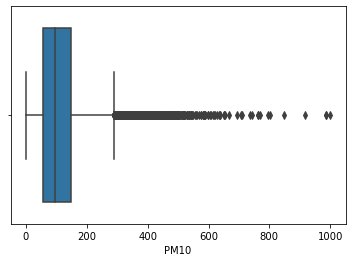

In [38]:
sns.boxplot(df['PM10'])

<AxesSubplot:xlabel='PM2.5'>

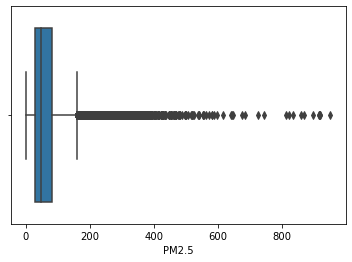

In [39]:
sns.boxplot(df['PM2.5'])

<AxesSubplot:xlabel='NO'>

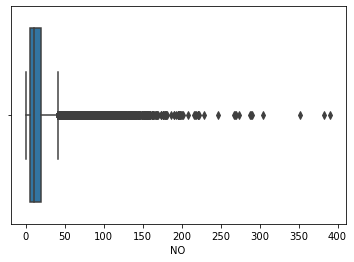

In [40]:
sns.boxplot(df['NO'])

<AxesSubplot:xlabel='NO2'>

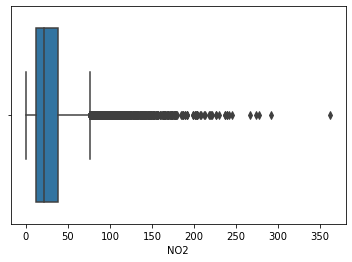

In [41]:
sns.boxplot(df['NO2'])

<AxesSubplot:xlabel='NO2'>

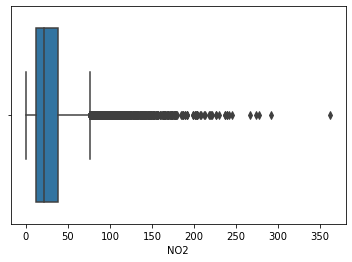

In [42]:
sns.boxplot(df['NO2'])

<AxesSubplot:xlabel='NOx'>

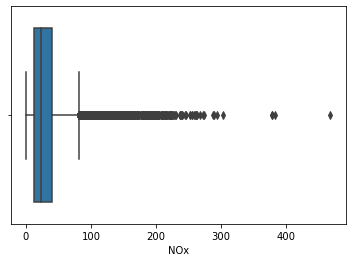

In [43]:
sns.boxplot(df['NOx'])

<AxesSubplot:xlabel='NH3'>

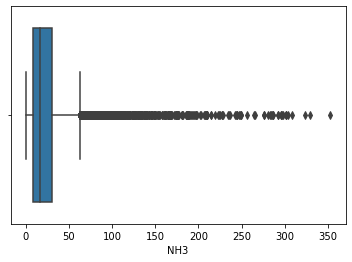

In [44]:
sns.boxplot(df['NH3'])

<AxesSubplot:xlabel='CO'>

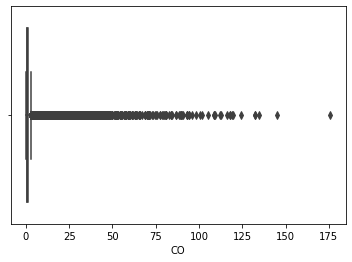

In [45]:
sns.boxplot(df['CO'])

<AxesSubplot:xlabel='SO2'>

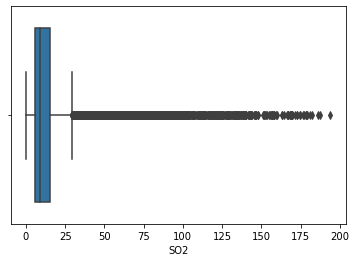

In [46]:
sns.boxplot(df['SO2'])

<AxesSubplot:xlabel='O3'>

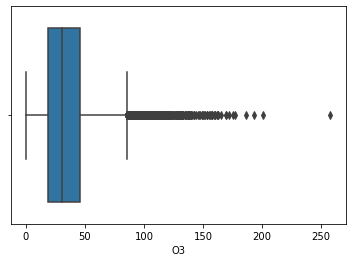

In [47]:
sns.boxplot(df['O3'])

<AxesSubplot:xlabel='Benzene'>

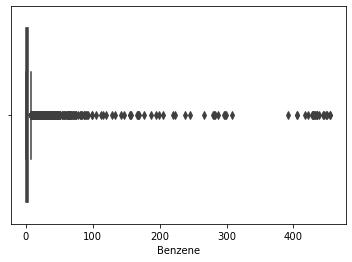

In [48]:
sns.boxplot(df['Benzene'])

<AxesSubplot:xlabel='Toluene'>

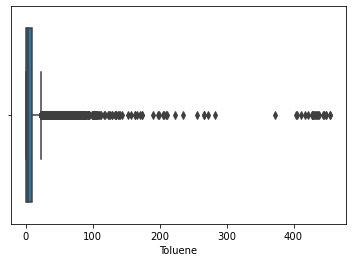

In [49]:
sns.boxplot(df['Toluene'])

<AxesSubplot:xlabel='Xylene'>

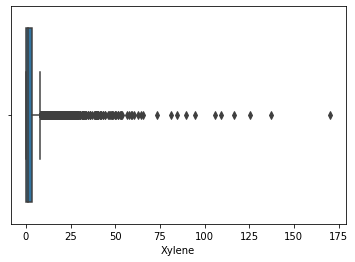

In [50]:
sns.boxplot(df['Xylene'])

<AxesSubplot:xlabel='AQI'>

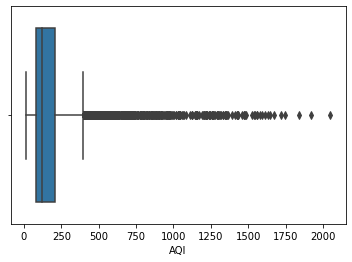

In [51]:
sns.boxplot(df['AQI'])

<AxesSubplot:xlabel='Year'>

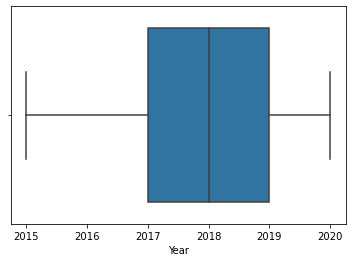

In [52]:
sns.boxplot(df['Year'])

In [53]:
df.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
PM2.5,1.000000,0.846498,0.433491,0.350709,0.436792,0.275086,0.089912,0.132325,0.161238,0.023911,0.117080,0.114579,0.659181,-0.229562
PM10,0.846498,1.000000,0.502349,0.464380,0.527768,0.376816,0.112588,0.256974,0.244919,0.022265,0.169335,0.081700,0.803313,-0.217182
NO,0.433491,0.502349,1.000000,0.478070,0.794890,0.185621,0.212607,0.170322,0.014580,0.035771,0.150857,0.094237,0.452191,-0.016900
NO2,0.350709,0.464380,0.478070,1.000000,0.627627,0.234938,0.356521,0.392233,0.293349,0.025260,0.273926,0.171701,0.537071,-0.066266
NOx,0.436792,0.527768,0.794890,0.627627,1.000000,0.166224,0.226992,0.238397,0.093170,0.039121,0.189386,0.087398,0.486450,-0.017956
NH3,0.275086,0.376816,0.185621,0.234938,0.166224,1.000000,0.104891,-0.038998,0.094972,-0.015650,0.013227,-0.019813,0.252019,-0.245343
CO,0.089912,0.112588,0.212607,0.356521,0.226992,0.104891,1.000000,0.489697,0.041736,0.061861,0.277904,0.154889,0.683346,-0.062637
SO2,0.132325,0.256974,0.170322,0.392233,0.238397,-0.038998,0.489697,1.000000,0.162142,0.036110,0.296139,0.251195,0.490586,0.040556
O3,0.161238,0.244919,0.014580,0.293349,0.093170,0.094972,0.041736,0.162142,1.000000,0.020255,0.130209,0.111410,0.198991,-0.019888
Benzene,0.023911,0.022265,0.035771,0.025260,0.039121,-0.015650,0.061861,0.036110,0.020255,1.000000,0.739286,0.415427,0.044407,0.040542


In [54]:
df.corr(method='pearson')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
PM2.5,1.000000,0.846498,0.433491,0.350709,0.436792,0.275086,0.089912,0.132325,0.161238,0.023911,0.117080,0.114579,0.659181,-0.229562
PM10,0.846498,1.000000,0.502349,0.464380,0.527768,0.376816,0.112588,0.256974,0.244919,0.022265,0.169335,0.081700,0.803313,-0.217182
NO,0.433491,0.502349,1.000000,0.478070,0.794890,0.185621,0.212607,0.170322,0.014580,0.035771,0.150857,0.094237,0.452191,-0.016900
NO2,0.350709,0.464380,0.478070,1.000000,0.627627,0.234938,0.356521,0.392233,0.293349,0.025260,0.273926,0.171701,0.537071,-0.066266
NOx,0.436792,0.527768,0.794890,0.627627,1.000000,0.166224,0.226992,0.238397,0.093170,0.039121,0.189386,0.087398,0.486450,-0.017956
NH3,0.275086,0.376816,0.185621,0.234938,0.166224,1.000000,0.104891,-0.038998,0.094972,-0.015650,0.013227,-0.019813,0.252019,-0.245343
CO,0.089912,0.112588,0.212607,0.356521,0.226992,0.104891,1.000000,0.489697,0.041736,0.061861,0.277904,0.154889,0.683346,-0.062637
SO2,0.132325,0.256974,0.170322,0.392233,0.238397,-0.038998,0.489697,1.000000,0.162142,0.036110,0.296139,0.251195,0.490586,0.040556
O3,0.161238,0.244919,0.014580,0.293349,0.093170,0.094972,0.041736,0.162142,1.000000,0.020255,0.130209,0.111410,0.198991,-0.019888
Benzene,0.023911,0.022265,0.035771,0.025260,0.039121,-0.015650,0.061861,0.036110,0.020255,1.000000,0.739286,0.415427,0.044407,0.040542


In [55]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,29531.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,2017.887914
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,1.533783
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,2017.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,2018.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,2019.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

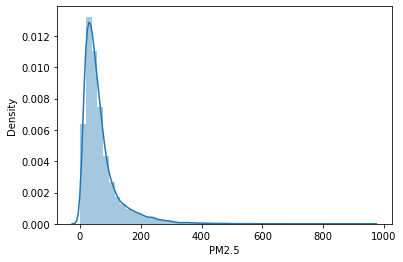

In [56]:
sns.distplot(df['PM2.5'].dropna())

<AxesSubplot:xlabel='PM10', ylabel='Density'>

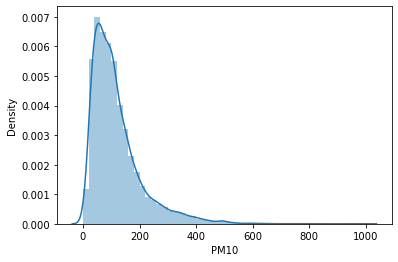

In [57]:
sns.distplot(df['PM10'].dropna())

<AxesSubplot:xlabel='NO', ylabel='Density'>

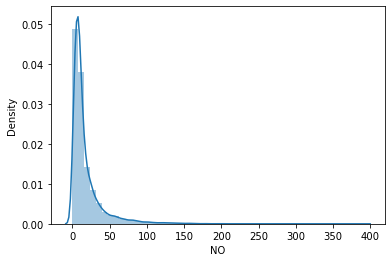

In [58]:
sns.distplot(df['NO'].dropna())

<AxesSubplot:xlabel='O3', ylabel='Density'>

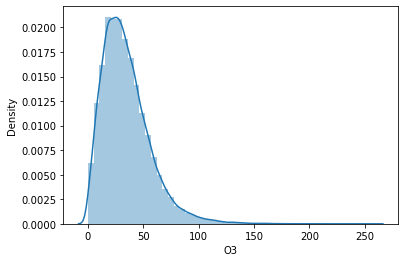

In [59]:
sns.distplot(df['O3'].dropna())

<AxesSubplot:xlabel='Year', ylabel='Density'>

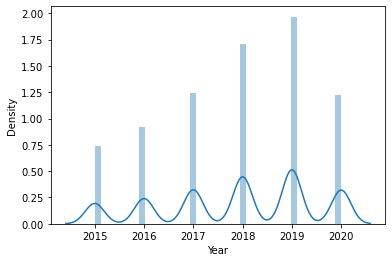

In [60]:
sns.distplot(df['Year'].dropna())

<AxesSubplot:xlabel='AQI', ylabel='Density'>

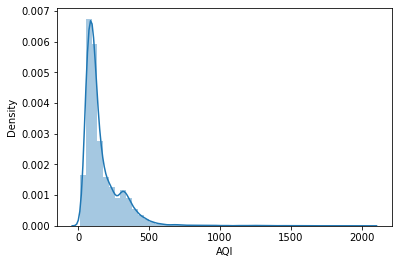

In [61]:
sns.distplot(df['AQI'].dropna())

<AxesSubplot:xlabel='Benzene', ylabel='Density'>

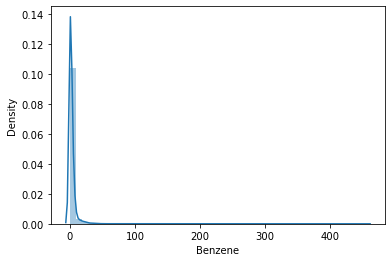

In [62]:
sns.distplot(df['Benzene'].dropna())

<AxesSubplot:xlabel='Xylene', ylabel='Density'>

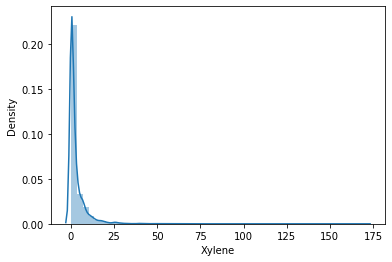

In [63]:
sns.distplot(df['Xylene'].dropna())

<AxesSubplot:xlabel='Benzene', ylabel='Density'>

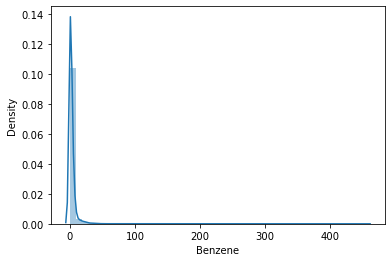

In [64]:
sns.distplot(df['Benzene'].dropna())

In [65]:
df.corr(method='pearson')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
PM2.5,1.000000,0.846498,0.433491,0.350709,0.436792,0.275086,0.089912,0.132325,0.161238,0.023911,0.117080,0.114579,0.659181,-0.229562
PM10,0.846498,1.000000,0.502349,0.464380,0.527768,0.376816,0.112588,0.256974,0.244919,0.022265,0.169335,0.081700,0.803313,-0.217182
NO,0.433491,0.502349,1.000000,0.478070,0.794890,0.185621,0.212607,0.170322,0.014580,0.035771,0.150857,0.094237,0.452191,-0.016900
NO2,0.350709,0.464380,0.478070,1.000000,0.627627,0.234938,0.356521,0.392233,0.293349,0.025260,0.273926,0.171701,0.537071,-0.066266
NOx,0.436792,0.527768,0.794890,0.627627,1.000000,0.166224,0.226992,0.238397,0.093170,0.039121,0.189386,0.087398,0.486450,-0.017956
NH3,0.275086,0.376816,0.185621,0.234938,0.166224,1.000000,0.104891,-0.038998,0.094972,-0.015650,0.013227,-0.019813,0.252019,-0.245343
CO,0.089912,0.112588,0.212607,0.356521,0.226992,0.104891,1.000000,0.489697,0.041736,0.061861,0.277904,0.154889,0.683346,-0.062637
SO2,0.132325,0.256974,0.170322,0.392233,0.238397,-0.038998,0.489697,1.000000,0.162142,0.036110,0.296139,0.251195,0.490586,0.040556
O3,0.161238,0.244919,0.014580,0.293349,0.093170,0.094972,0.041736,0.162142,1.000000,0.020255,0.130209,0.111410,0.198991,-0.019888
Benzene,0.023911,0.022265,0.035771,0.025260,0.039121,-0.015650,0.061861,0.036110,0.020255,1.000000,0.739286,0.415427,0.044407,0.040542


<AxesSubplot:>

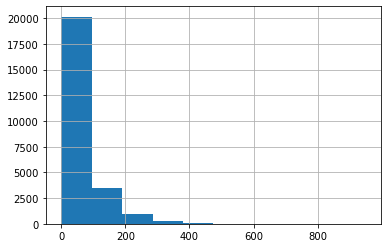

In [66]:
df['PM2.5'].hist(bins=10)

<AxesSubplot:>

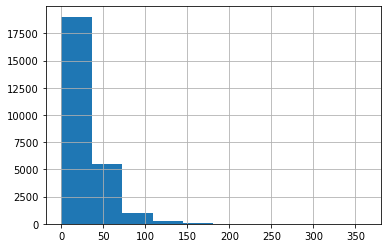

In [67]:
df['NO2'].hist(bins=10)

In [68]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Year              0
dtype: int64

In [69]:
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].median())
df['PM10'] = df['PM10'].fillna(df['PM10'].median())
df['NO'] = df['NO'].fillna(df['NO'].median())
df['NO2'] = df['NO2'].fillna(df['NO2'].median())
df['NOx'] = df['NOx'].fillna(df['NOx'].median())
df['NH3'] = df['NH3'].fillna(df['NH3'].median())
df['CO'] = df['CO'].fillna(df['CO'].median())
df['SO2'] = df['SO2'].fillna(df['SO2'].median())
df['O3'] = df['O3'].fillna(df['O3'].mean())
df['Benzene'] = df['Benzene'].fillna(df['Benzene'].median())
df['Toluene'] = df['Toluene'].fillna(df['Toluene'].median())
df['AQI'] = df['AQI'].fillna(df['AQI'].median())


In [70]:
df['Xylene'] = df['Xylene'].fillna(df['Xylene'].median())

In [63]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
Year             0
dtype: int64

In [71]:
df.corr(method='pearson')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
PM2.5,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.160186,0.030539,0.132609,0.087813,0.633654,-0.170771
PM10,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.203480,0.027522,0.126400,0.030257,0.447686,-0.067119
NO,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.015216,0.045202,0.151930,0.084393,0.438039,0.009100
NO2,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.284674,0.042179,0.297913,0.188965,0.531952,-0.041194
NOx,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.085854,0.049004,0.184764,0.085447,0.436282,-0.003627
NH3,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.071464,0.004093,0.020040,-0.030328,0.097916,-0.116269
CO,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.039861,0.066022,0.285559,0.181215,0.650475,-0.057421
SO2,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.155889,0.038955,0.273314,0.249808,0.454182,0.059695
O3,0.160186,0.203480,0.015216,0.284674,0.085854,0.071464,0.039861,0.155889,1.000000,0.020615,0.129474,0.079466,0.193172,-0.018367
Benzene,0.030539,0.027522,0.045202,0.042179,0.049004,0.004093,0.066022,0.038955,0.020615,1.000000,0.693310,0.094190,0.052027,0.041066


In [65]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,NaN,2015
1,Ahmedabad,2015-02-01,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,NaN,2015
2,Ahmedabad,2015-03-01,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,NaN,2015
3,Ahmedabad,2015-04-01,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,NaN,2015
4,Ahmedabad,2015-05-01,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020


In [75]:
dummies = pd.get_dummies(df.City)

In [80]:
df2 = pd.concat([df,dummies],axis=1)

In [81]:
df2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,...,0,0,0,0,0,0,0,0,0,0
1,Ahmedabad,2015-02-01,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,...,0,0,0,0,0,0,0,0,0,0
2,Ahmedabad,2015-03-01,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,...,0,0,0,0,0,0,0,0,0,0
3,Ahmedabad,2015-04-01,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,...,0,0,0,0,0,0,0,0,0,0
4,Ahmedabad,2015-05-01,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,...,0,0,0,0,0,0,0,0,0,1
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,...,0,0,0,0,0,0,0,0,0,1
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,...,0,0,0,0,0,0,0,0,0,1
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,...,0,0,0,0,0,0,0,0,0,1


In [82]:
df1 = df2.drop(columns=['AQI_Bucket','Date','City','Year','City'],axis=1)

In [83]:
df1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,...,0,0,0,0,0,0,0,0,0,0
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,...,0,0,0,0,0,0,0,0,0,0
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,...,0,0,0,0,0,0,0,0,0,0
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,...,0,0,0,0,0,0,0,0,0,0
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,...,0,0,0,0,0,0,0,0,0,1
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,...,0,0,0,0,0,0,0,0,0,1
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,...,0,0,0,0,0,0,0,0,0,1
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,...,0,0,0,0,0,0,0,0,0,1


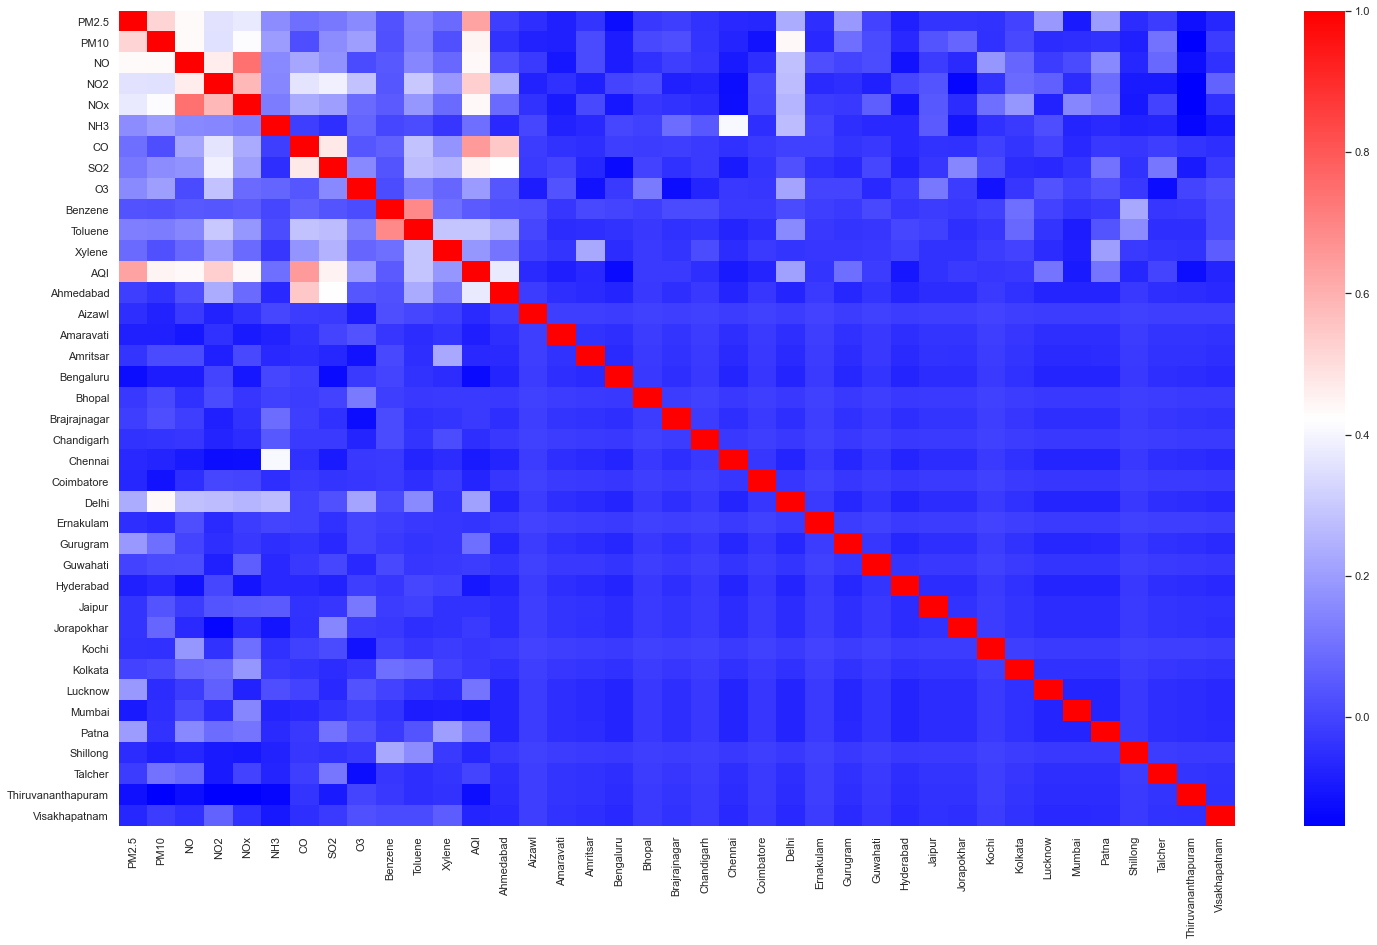

In [84]:
sns.set(rc ={'figure.figsize':(25,15)})
correlation = df1.corr()
sns.heatmap(correlation, cmap='bwr')
plt.show()

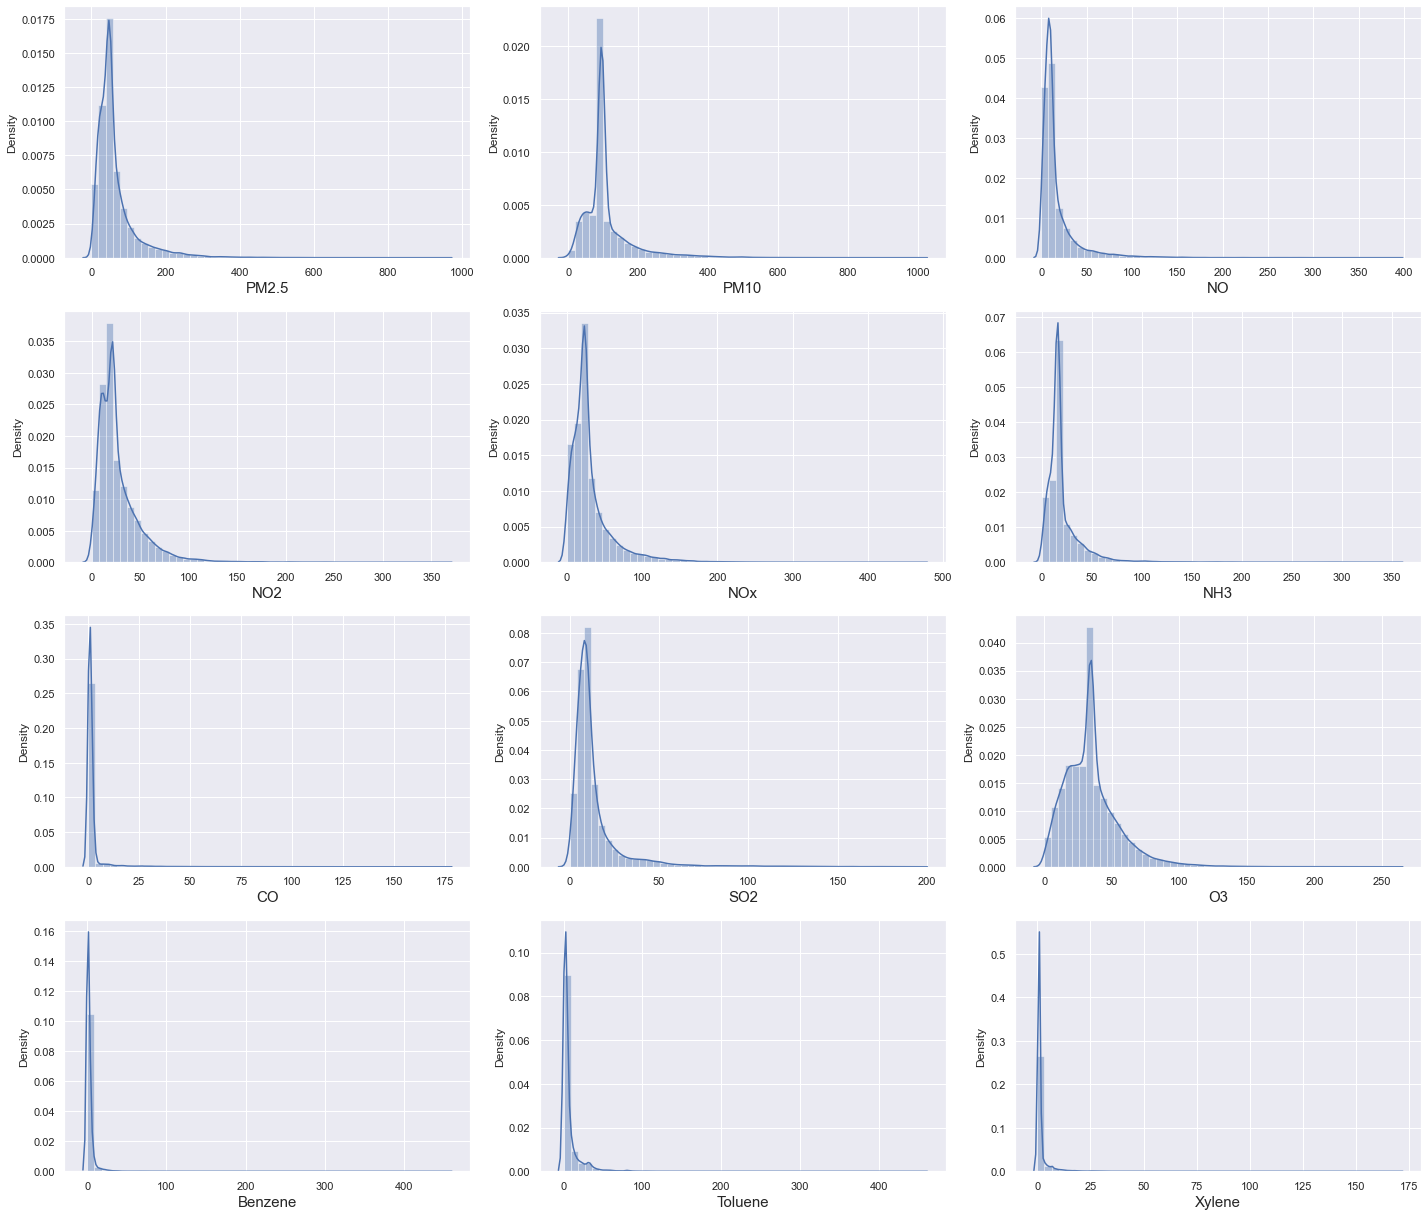

In [69]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df1:
    if plotnumber<=12: 
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [85]:
X = df1.drop('PM2.5', axis=1)
y = df1['PM2.5']

In [86]:
X

,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,...,0,0,0,0,0,0,0,0,0,0
1,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,...,0,0,0,0,0,0,0,0,0,0
2,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,...,0,0,0,0,0,0,0,0,0,0
3,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,...,0,0,0,0,0,0,0,0,0,0
4,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,...,0,0,0,0,0,0,0,0,0,1
29527,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,...,0,0,0,0,0,0,0,0,0,1
29528,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,...,0,0,0,0,0,0,0,0,0,1
29529,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1


In [87]:
y

0        48.57
1        48.57
2        48.57
3        48.57
4        48.57
         ...  
29526    15.02
29527    24.38
29528    22.91
29529    16.64
29530    15.00
Name: PM2.5, Length: 29531, dtype: float64

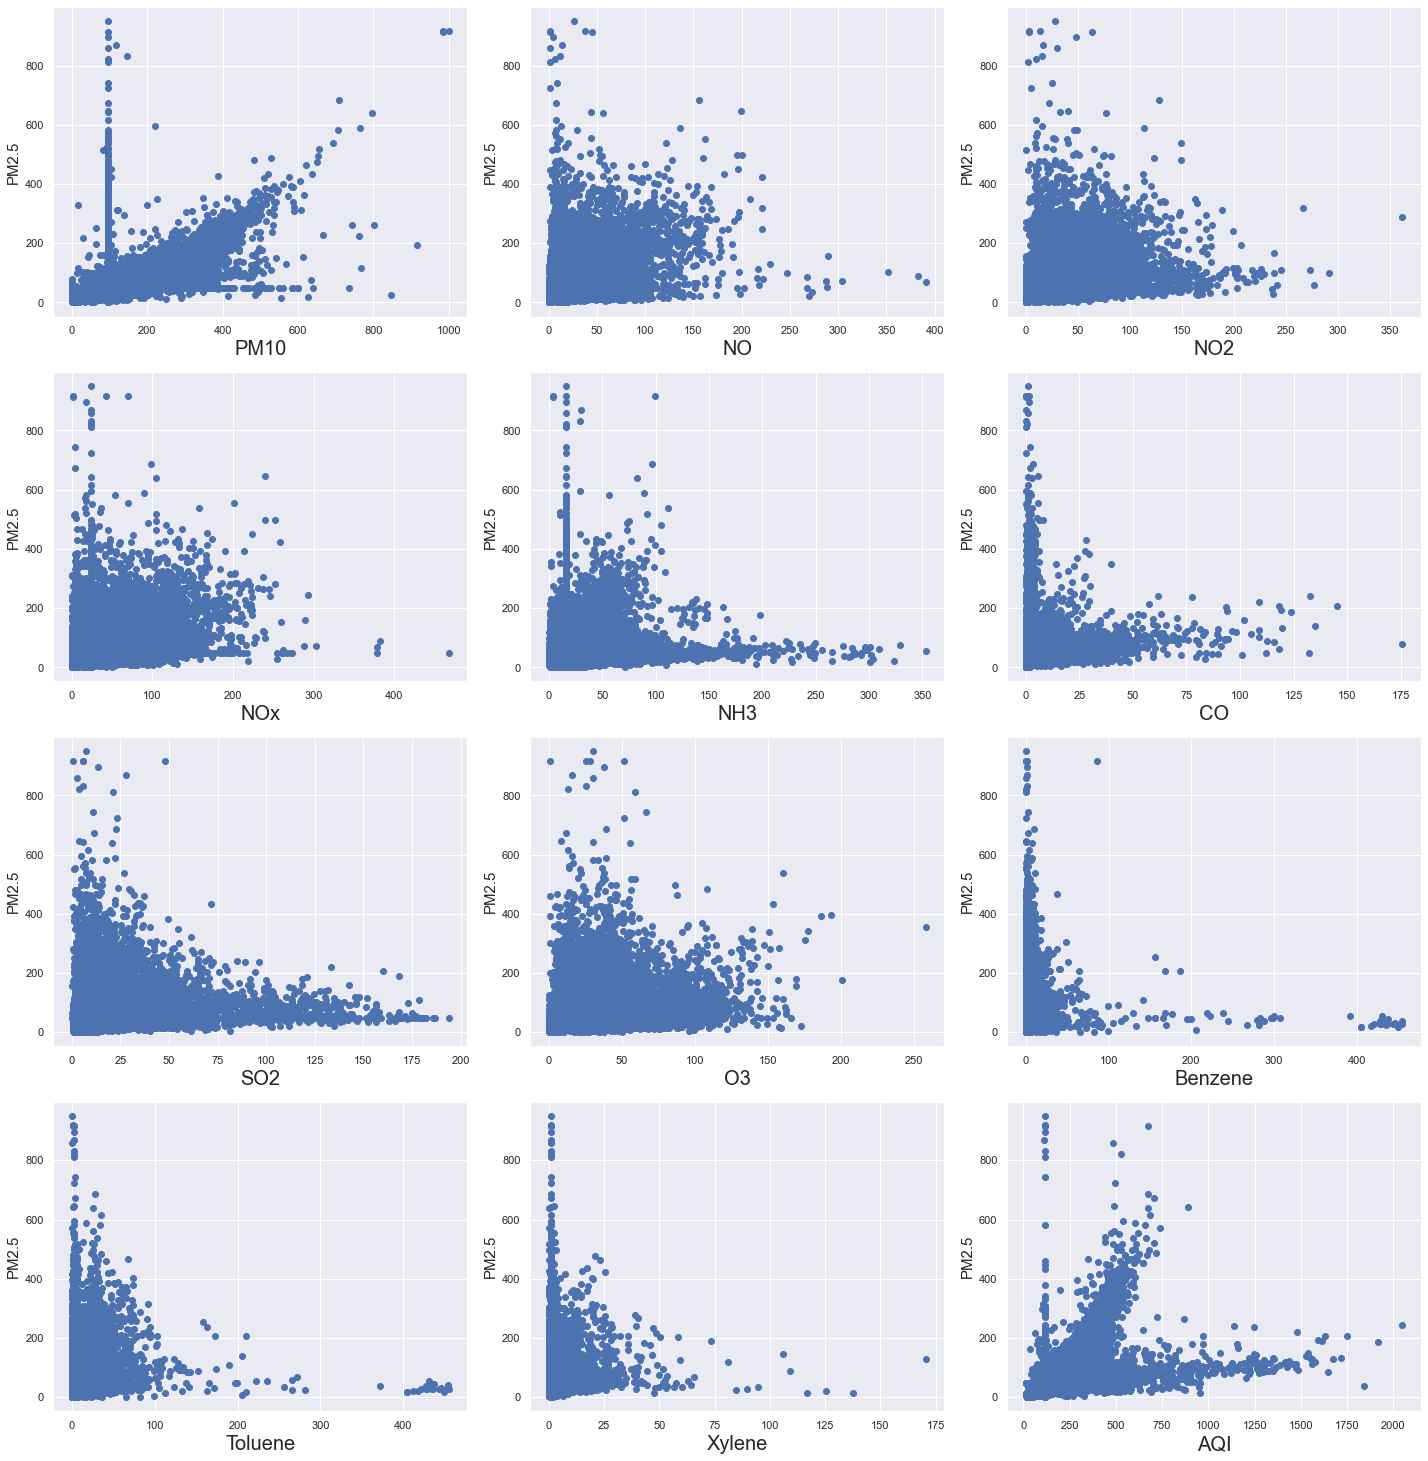

In [88]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for col in X:
    if plotnumber <=12:
        ax=plt.subplot(6,3,plotnumber)
        plt.scatter(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('PM2.5',fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [89]:
scaler = StandardScaler()

In [90]:
x_scaled = scaler.fit_transform(X)

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=45)

In [92]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [93]:
regression.coef_

array([ 8.67026351e+00,  7.72578635e+00, -4.78775199e-01,  5.01588903e-01,
        2.21500875e+00, -2.39560440e+01, -3.29415206e+00, -1.11559108e-02,
        5.38016745e-01,  3.57482007e-01, -1.07173889e-01,  4.64899379e+01,
       -7.13214056e+12, -1.74878220e+12, -5.00047546e+12, -5.63920258e+12,
       -7.13214056e+12, -2.78831855e+12, -4.96730939e+12, -2.85903085e+12,
       -7.13214056e+12, -3.21710779e+12, -7.13214056e+12, -2.09214614e+12,
       -6.55908820e+12, -3.66148978e+12, -7.12720184e+12, -5.39661752e+12,
       -5.52288006e+12, -2.09214614e+12, -4.63736913e+12, -7.13214056e+12,
       -7.13214056e+12, -6.87766322e+12, -2.88681075e+12, -4.93388887e+12,
       -5.39196072e+12, -6.14436613e+12])

In [94]:
regression.score(x_train,y_train)

0.6482491810478306

In [149]:
regression.score(x_test,y_test)

0.6203759111691214

In [96]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [97]:
adj_r2(x_train,y_train)

0.6476013266895433

In [98]:
adj_r2(x_test,y_test)

0.6274886913836388

In [99]:
lasscv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [100]:
alpha=lasscv.alpha_
alpha

0.0008043841919297901

In [101]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0008043841919297901)

In [102]:
lasso_reg.score(x_train,y_train)

0.648249236087973

In [103]:
lasso_reg.score(x_test,y_test)

0.6290807877791466

In [104]:
import numpy as np

In [105]:
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridge_cv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([5.72789552, 2.72364302, 9.08227058, 7.73334523, 5.3463346 ,
       7.42090235, 1.04813583, 4.75242435, 8.63545613, 7.19908713,
       7.96954178, 1.67761641, 9.86686377, 2.1053045 , 9.97002359,
       2.62336818, 2.42896528, 5.62670174, 7.31245316, 5.59920352,
       0.17078073, 5.6418074 , 5.96905616, 5.96233376, 8.19347864,
       4.76347665, 0.07781087, 4.01077619, 6.03592326, 7.64618782,
       1.78723446, 5.52881378, 0.7060451 , 8.16671812, 4.2666844 ,
       3.64367196, 0.51706887, 7.65981687, 6.58855791, 6.03247284,
       4.78342109, 5.14236618, 7.15102148, 1.95377203, 4.06526114,
       2.71081379, 8.68162773, 1.10164332, 8.70011963, 0.54592826]),
        cv=10, normalize=True)

In [106]:
ridge_cv.alpha_

0.07781086922658664

In [107]:
ridge_model=Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.07781086922658664)

In [108]:
ridge_model.score(x_train,y_train)

0.6482492444316028

In [109]:
ridge_model.score(x_test,y_test)

0.6290787873517163

In [110]:
elastic_cv=ElasticNetCV(alphas=None,cv=586)
elastic_cv.fit(x_train,y_train)

ElasticNetCV(cv=586)

In [111]:
elastic_cv.alpha_

0.07592270996023726

In [112]:
elastic_cv.l1_ratio

0.5

In [113]:
elastic_reg=ElasticNet(alpha=elastic_cv.alpha_,l1_ratio=0.5)
elastic_reg.fit(x_train,y_train)

ElasticNet(alpha=0.07592270996023726)

In [114]:
elastic_reg.score(x_train,y_train)

0.6449221058115722

In [115]:
elastic_reg.score(x_test,y_test)

0.627362580928942

In [116]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [117]:
gscv = GridSearchCV(lasso_reg, param_grid=parameters, cv=30)

In [118]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=30, estimator=Lasso(alpha=0.0008043841919297901),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})

In [119]:
gscv.best_params_['alpha']

0.1

In [120]:
gscv.best_params_['alpha']

0.1

In [121]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=30, estimator=Lasso(alpha=0.0008043841919297901),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})

In [122]:
gscv.score(x_train,y_train)

0.6481224949607354

In [123]:
gscv.score(x_test,y_test)

0.6293105995331767

## Random Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=20)

In [126]:
Random_clf = RandomForestRegressor(n_estimators=115,random_state=16)

In [127]:
Random_clf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=115, random_state=16)

In [128]:
Random_clf.score(x_train,y_train)

0.9768327744712797

In [129]:
Random_clf.score(x_test,y_test)

0.8223357969894859

## Hyperparameter Tunning

In [130]:
Random_clf = RandomForestRegressor(criterion = 'mae',max_depth = 15,max_features = 'auto',min_samples_leaf = 5,min_samples_split=5
                                 ,n_estimators=100,random_state=10,n_jobs =-1)

In [131]:
Random_clf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=15, min_samples_leaf=5,
                      min_samples_split=5, n_jobs=-1, random_state=10)

In [132]:
Random_clf.score(x_train,y_train)

0.8585869180103507

In [133]:
Random_clf.score(x_test,y_test)

0.7889288519706864

In [134]:
y_pred = Random_clf.predict(x_test)

In [135]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_auc_score,mean_absolute_error

In [136]:
from sklearn import metrics

In [137]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.900195129796844
Mean Squared Error: 840.2951059301733
Root Mean Squared Error: 28.987844106283127


In [138]:
def adj_r2(x,y):
    r2 = Random_clf.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [139]:
Random_clf.score(x_train,y_train)

0.8585869180103507

In [140]:
Random_clf.score(x_test,y_test)

0.7889288519706864

In [150]:
import pickle

In [151]:
with open('Airqualityindex.pickle','wb') as f:
    pickle.dump(lr,f)

In [152]:
import json

In [153]:
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [154]:
df1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,...,0,0,0,0,0,0,0,0,0,0
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,...,0,0,0,0,0,0,0,0,0,0
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,...,0,0,0,0,0,0,0,0,0,0
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,...,0,0,0,0,0,0,0,0,0,0
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,...,0,0,0,0,0,0,0,0,0,1
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,...,0,0,0,0,0,0,0,0,0,1
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,...,0,0,0,0,0,0,0,0,0,1
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,...,0,0,0,0,0,0,0,0,0,1


In [156]:
df1.iloc[2]

PM2.5                  48.57
PM10                   95.68
NO                     17.40
NO2                    19.30
NOx                    29.70
NH3                    15.85
CO                     17.40
SO2                    29.07
O3                     30.70
Benzene                 6.80
Toluene                16.40
Xylene                  2.25
AQI                   118.00
Ahmedabad               1.00
Aizawl                  0.00
Amaravati               0.00
Amritsar                0.00
Bengaluru               0.00
Bhopal                  0.00
Brajrajnagar            0.00
Chandigarh              0.00
Chennai                 0.00
Coimbatore              0.00
Delhi                   0.00
Ernakulam               0.00
Gurugram                0.00
Guwahati                0.00
Hyderabad               0.00
Jaipur                  0.00
Jorapokhar              0.00
Kochi                   0.00
Kolkata                 0.00
Lucknow                 0.00
Mumbai                  0.00
Patna         

## decission tree

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=45)

In [128]:
dtc = DecisionTreeRegressor()

In [129]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [130]:
dtc.score(x_train,y_train)

0.9999954241410599

In [131]:
dtc.score(x_test,y_test)

0.6789200084621441

## bagging Technique

In [132]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=10)

In [134]:
knn = KNeighborsRegressor(n_neighbors = 30)

In [135]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=30)

In [136]:
knn.score(x_train,y_train)

0.779818256462474

In [137]:
knn.score(x_test,y_test)

0.7073963162729902

In [138]:
bag_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors=30),n_estimators=10,max_samples = 0.5,bootstrap=True,random_state=3,oob_score=True)

In [139]:
bag_knn.fit(x_train,y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=30),
                 max_samples=0.5, oob_score=True, random_state=3)

In [140]:
bag_knn.score(x_train,y_train)

0.7467487863402122

In [141]:
bag_knn.score(x_test,y_test)

0.6820146754610339

In [142]:
def adj_r2(x,y):
    r2 = bag_knn.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [143]:
adj_r2(x_train,y_train)

0.7466016755567909

In [144]:
adj_r2(x_test,y_test)

0.6815833627115745

In [141]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [142]:
cv=100 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["PM2.5"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()


LinearRegression() 

r_2 score : 0.6162933711592105 

CV scores: [0.6949261  0.74419278 0.7101943  0.72474903 0.5392638  0.7286235
 0.60391677 0.53522788 0.66888598 0.37969756 0.71880296 0.79240136
 0.80289776 0.32848304 0.74588357 0.70522549 0.7005787  0.70899063
 0.57875483 0.79749348 0.37968706 0.79443826 0.65101806 0.69604711
 0.72309669 0.72833432 0.76753779 0.79225481 0.77057398 0.78691718
 0.38773424 0.7572075  0.69844828 0.69652816 0.35883678 0.55040404
 0.78486733 0.45510637 0.66604602 0.68461361 0.55056866 0.64780862
 0.78330196 0.1539558  0.69799495 0.76185748 0.77741622 0.72068484
 0.71648326 0.74986756 0.68683759 0.60147047 0.67852616 0.69556066
 0.62044508 0.71038479 0.75877043 0.69468129 0.85693297 0.71761828
 0.61505877 0.58704445 0.71256869 0.472347   0.62893619 0.70125571
 0.7650865  0.5590984  0.72707059 0.73763815 0.78510219 0.59989569
 0.65797713 0.82016087 0.70714282 0.64283784 0.54997438 0.7300395
 0.75789727 0.689194   0.69741629 0.31820055 0.71796064 0.74067597

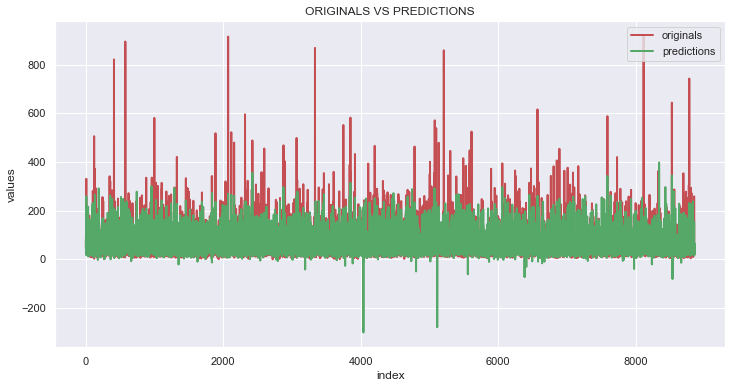

In [143]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

RandomForestRegressor() 

r_2 score : 0.8229621009287682 

CV scores: [0.80819684 0.91281447 0.92085503 0.87528904 0.73972037 0.88961347
 0.90650176 0.89309142 0.78859283 0.903447   0.94623017 0.92656502
 0.9119738  0.48678221 0.8538124  0.90082885 0.79961358 0.89973273
 0.75120026 0.90479031 0.68630847 0.92046507 0.92774032 0.85047667
 0.89701236 0.89689917 0.92196946 0.91324177 0.90973277 0.92672665
 0.79990189 0.85742244 0.9370517  0.89826868 0.82017509 0.82289956
 0.94748501 0.58820301 0.79691022 0.84699807 0.92746462 0.91111062
 0.91862192 0.44883963 0.76301537 0.87586767 0.82335948 0.89030446
 0.8348598  0.89944074 0.85644524 0.86795809 0.77537216 0.92689152
 0.87898265 0.90113005 0.87663988 0.90095017 0.91422579 0.8938981
 0.83216948 0.70557237 0.86636243 0.826344   0.85381231 0.89352579
 0.8186644  0.7588731  0.90432239 0.92318415 0.84834942 0.70450097
 0.93499933 0.92710159 0.7998982  0.84251422 0.84493145 0.86810846
 0.90181755 0.93918574 0.88572945 0.29992249 0.84226275 0.92

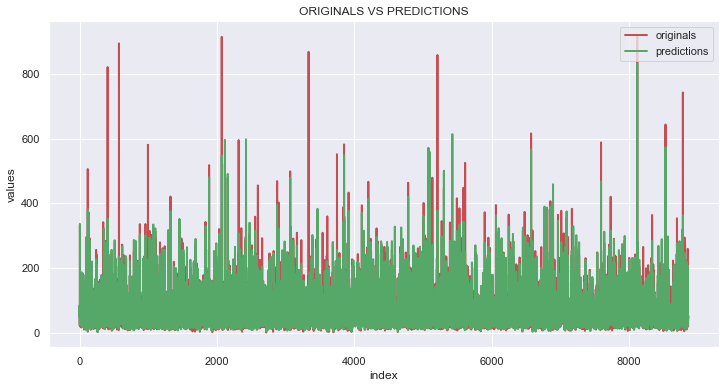

In [144]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor()
model(lr,x_train,y_train,x_test,y_test)

DecisionTreeRegressor() 

r_2 score : 0.7076978466617773 

CV scores: [ 0.66173066  0.84718685  0.80972837  0.86705039  0.7468225   0.70839622
  0.33294238  0.72584762  0.66460272  0.79786212  0.87486236  0.90372064
  0.57379409 -0.07529093 -0.73413861  0.81905149  0.75169598  0.79500503
  0.73854811  0.62619758  0.69713386  0.79311786  0.84994816  0.4682091
  0.74038338  0.65559369  0.82378257  0.80167803  0.8118864   0.87065766
  0.64358062  0.60331454  0.90970079  0.84051403  0.85849378  0.68825164
  0.88137375  0.4972563   0.66346515  0.81417688  0.82784199  0.11263014
  0.82088551  0.2215366   0.53883595  0.72944394  0.69116156  0.81781833
  0.60806281  0.84219027  0.80112866  0.85130852  0.72548679  0.88679215
  0.64342901  0.74310367  0.75934743  0.71378587  0.81023841  0.73636526
  0.64916695  0.65146277  0.74722925  0.64810919  0.72454411  0.86692727
  0.77090795  0.71656333  0.76061872  0.77795079  0.70041409  0.49288326
  0.77670765  0.84124272  0.76381395  0.76415713  0.834

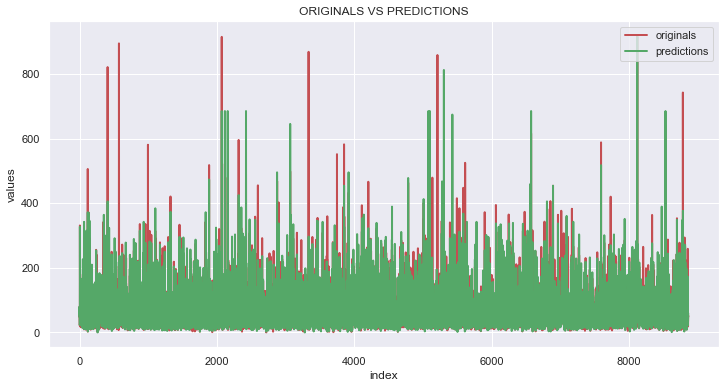

In [145]:
from sklearn.tree import DecisionTreeRegressor
lr = DecisionTreeRegressor()
model(lr,x_train,y_train,x_test,y_test)

SVR() 

r_2 score : 0.5692282232536072 

CV scores: [0.68869964 0.64696657 0.71868143 0.56057453 0.54184533 0.76316594
 0.73134372 0.66648474 0.60039685 0.63210398 0.6728982  0.69954798
 0.70090669 0.52071775 0.73202078 0.67153545 0.64511512 0.59195731
 0.64323849 0.59342513 0.27062668 0.71180333 0.67274652 0.66299424
 0.61644738 0.66232452 0.71079715 0.75254194 0.63263177 0.75383941
 0.62165841 0.67738193 0.6037919  0.52649036 0.28784379 0.65844768
 0.6888611  0.35691925 0.6056706  0.63601373 0.68999437 0.45177399
 0.6766105  0.5715852  0.72022438 0.72044525 0.6244359  0.62861206
 0.53382041 0.62597481 0.6264805  0.57121348 0.61992096 0.64898703
 0.60799912 0.83991604 0.73611984 0.61588771 0.70103667 0.70757359
 0.64599102 0.58248619 0.68443163 0.59830562 0.73957119 0.55805224
 0.6447519  0.56288692 0.52488753 0.68972179 0.69476441 0.52362932
 0.59783897 0.58520771 0.70576313 0.71070457 0.66729913 0.60210056
 0.64820863 0.68582755 0.58759288 0.28381154 0.73750134 0.69289714
 0.6844117

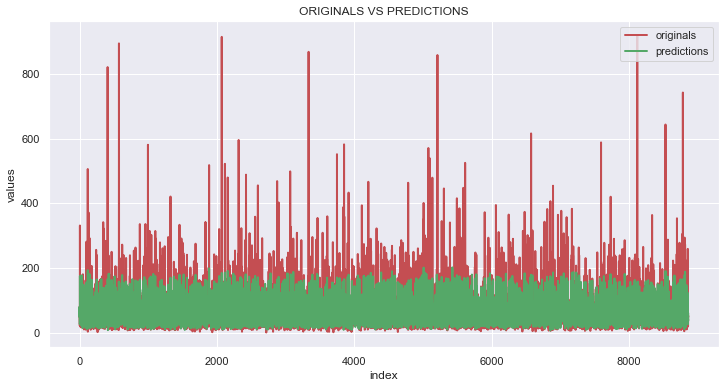

In [146]:
from sklearn.svm import SVR
lr = SVR()
model(lr,x_train,y_train,x_test,y_test)

KNeighborsRegressor() 

r_2 score : 0.7600090027137973 

CV scores: [0.78541406 0.89817561 0.89049218 0.78177536 0.61218682 0.85535675
 0.84122022 0.88905005 0.80670722 0.82447794 0.88726831 0.85177384
 0.8820907  0.52399105 0.85980819 0.83039274 0.84937104 0.87715882
 0.74370135 0.80228069 0.45888339 0.82305512 0.90694596 0.77385904
 0.90140996 0.86397124 0.86989652 0.8978938  0.86437328 0.89392394
 0.76798102 0.76730907 0.87532359 0.81206745 0.48763368 0.8163586
 0.93161659 0.54805042 0.78013839 0.83274827 0.86367772 0.74614677
 0.88012635 0.61807027 0.83535774 0.88575392 0.83053673 0.79845861
 0.75845949 0.87722237 0.79990468 0.8501259  0.79647157 0.85330966
 0.86527118 0.87288314 0.77389774 0.75572251 0.91753432 0.84143167
 0.8048069  0.72577416 0.83336195 0.84853464 0.84679887 0.82278578
 0.79585106 0.72795359 0.85083732 0.87135454 0.92183089 0.71496327
 0.88624955 0.8587462  0.76705988 0.77051872 0.70999674 0.82611855
 0.85142318 0.91262577 0.77646345 0.34906177 0.84729181 0.9135

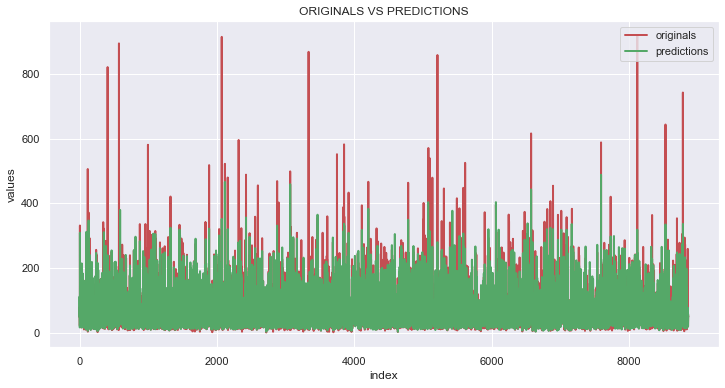

In [147]:
from sklearn.neighbors import KNeighborsRegressor
lr = KNeighborsRegressor()
model(lr,x_train,y_train,x_test,y_test)